In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix



In [3]:
#df = pd.read_csv("compas-scores-two-years-violent.csv", index_col=0)
df = pd.read_csv("compas-scores-two-years.csv", index_col=0)


In [4]:
y = y = df['two_year_recid']
keep_cols = [
    'age',             # defendant age
    'sex',             # male/female
    'race',            # categorical
    'priors_count',    # number of prior offenses
    'c_charge_degree'  # felony vs misdemeanor
]

X_safe = df[keep_cols].copy()

# One‐hot encode the categoricals
X= pd.get_dummies(X_safe, drop_first=True)

In [5]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [6]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',class_weight='balanced',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.67
Precision: 0.64
Recall: 0.67


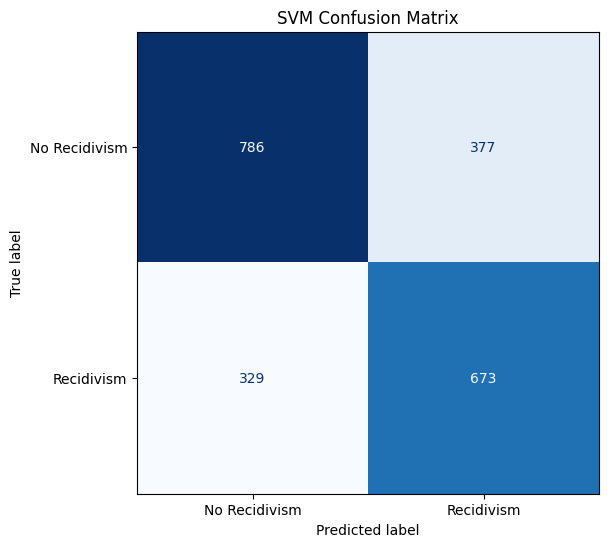

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Recidivism', 'Recidivism']
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("SVM Confusion Matrix")
plt.show()